# Understand the structure of Dataset

# The dataset is taken from www.kaggle.com
#  The dataset name is the LendingClub: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

# No not download the zip file from the link, through which some feature engineering will be missed

Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

# Data Analysis

In [450]:
import pandas as pd

In [451]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
# we are starting our index column from LoanStatNew

In [452]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [453]:
#example
#print(data_info.loc['revol_util']['Description'])

In [454]:
# with the use of this function we can read easily each description of values
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [455]:
feat_info('mort_acc')

Number of mortgage accounts.


In [456]:
feat_info('pub_rec')

Number of derogatory public records


In [457]:
#Imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [458]:
df = pd.read_csv('lending_club_loan_two.csv')

In [459]:
df.info()

# total columns 27
# total rows 396030

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [460]:
# OVERALL GOAL: Get an understanding for which features are important, view summary statistics, and visualize the data

In [461]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


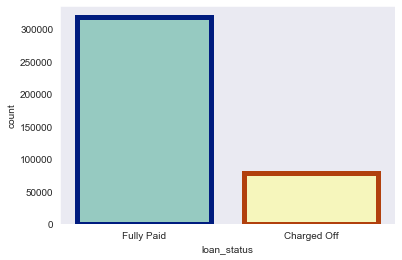

In [462]:
sns.set_style(style='dark')

# to check the status of loan
sns.countplot(x='loan_status',data=df,edgecolor=sns.color_palette("dark", 3),lw=5,palette='Set3')

(0, 45000)

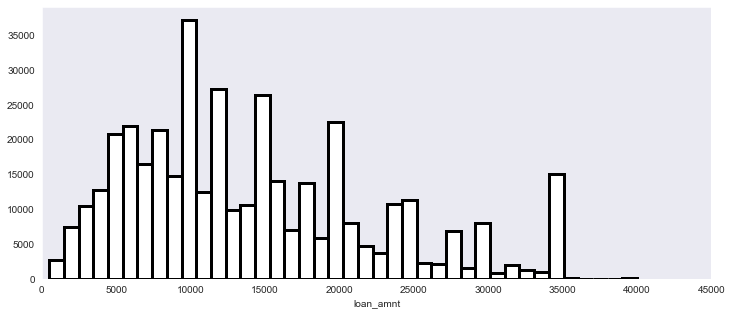

In [463]:
plt.figure(figsize=(12,5))
sns.distplot(a=df['loan_amnt'],kde=False,bins=40,hist_kws={'linewidth':3,'alpha':1,'color':'white','edgecolor':'black'})
plt.xlim(0,45000)

In [464]:
# check correlation

df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

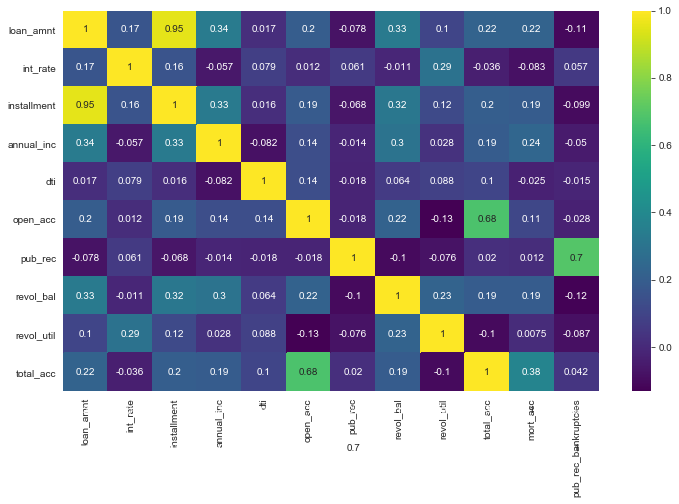

In [465]:
# plot a heatmap and resize it
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

# the correlation with installment feature

In [466]:
df['installment'].value_counts()

327.34    968
332.10    791
491.01    736
336.90    686
392.81    683
         ... 
785.23      1
160.97      1
160.03      1
599.45      1
256.00      1
Name: installment, Length: 55706, dtype: int64

In [467]:
df['loan_amnt'].value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
37450.0        1
36775.0        1
725.0          1
36225.0        1
35475.0        1
Name: loan_amnt, Length: 1397, dtype: int64

In [468]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [469]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


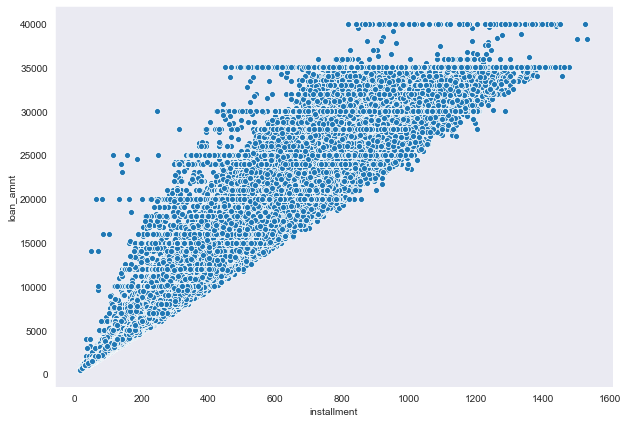

In [470]:
# we check the relationship b/w installment and loan_amnt feature
plt.figure(figsize=(10,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

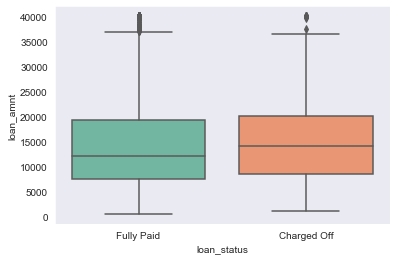

In [471]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df,palette='Set2')

In [472]:
# summary stats

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [473]:
# checking grade and sub_grade

df['grade'].nunique()

7

In [474]:
order1 = sorted(df['grade'].unique())
order1

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [475]:
df['sub_grade'].nunique()

35

In [476]:
order2 = sorted(df['sub_grade'].unique())
order2

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

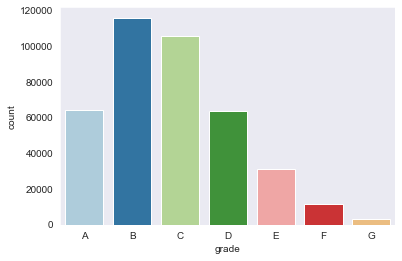

In [477]:
sns.countplot(x='grade',data=df,palette='Paired',order=order1)

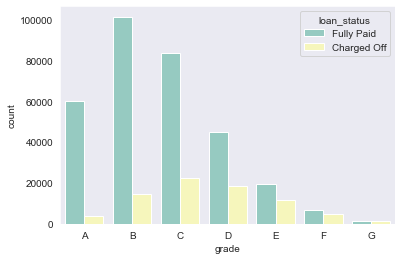

In [478]:
sns.countplot(x='grade',data=df,hue='loan_status',palette='Set3',order=order1)

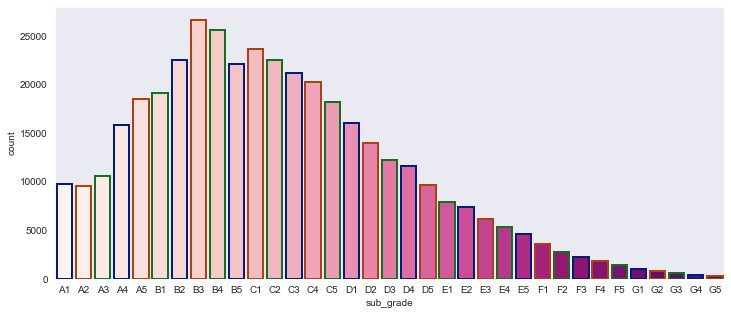

In [479]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=df,palette='RdPu',lw=2,edgecolor=sns.color_palette("dark", 3),order=order2)

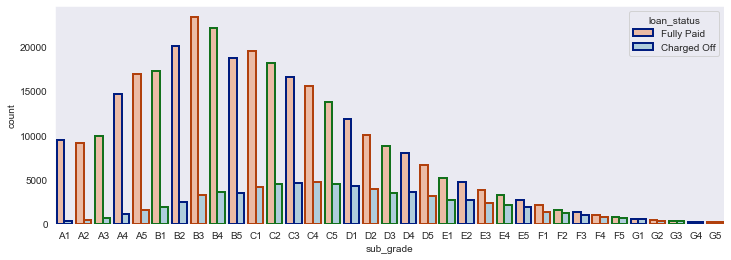

In [480]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status',data=df,palette='RdBu',lw=2,edgecolor=sns.color_palette("dark", 3),order=order2)

In [481]:
# we explore more for grades from F to G :

f_and_g = df[((df['grade'] == 'F') | (df['grade'] == 'G'))]

order3 = sorted(f_and_g['sub_grade'].unique())

In [482]:
order3

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

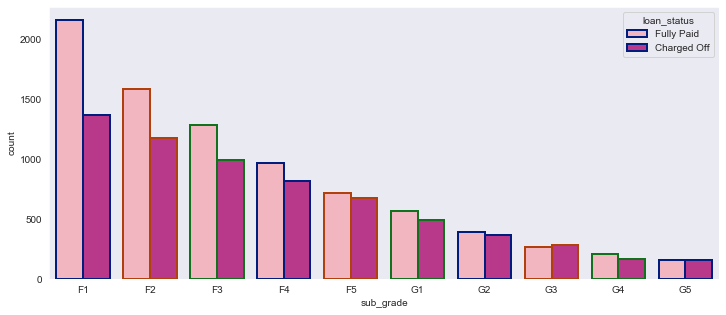

In [483]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=f_and_g,palette='RdPu',lw=2,edgecolor=sns.color_palette("dark", 3),order=order3,hue='loan_status')

In [484]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [485]:
# creating new column

df['loan_repaid'] = df.loan_status.map({'Fully Paid' : 1 , 'Charged Off' : 0})

In [486]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

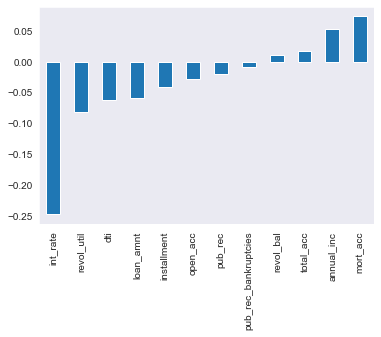

In [488]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Wrangling

In [489]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [490]:
# first we will work with the missing data

In [491]:
len(df)

396030

In [492]:
# this will define how many missing values are there in a column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [493]:
# checking the % divided by the total length of the dataset
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [494]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [495]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [496]:
df['emp_title'].nunique()

173105

In [497]:
df['emp_title'].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
                                         ... 
99 restaurant and Burtons Grill             1
navigator development group                 1
Crothall Healthcare Inc.                    1
Deputy Chief Wing Weapons and Tactics       1
Occupational Therapist Assistant            1
Name: emp_title, Length: 173105, dtype: int64

In [498]:
# by this we get to know that emp_title has huge number of unique values , for that it will be huge dataset for creating dummies ,
# so we will drop this column

In [499]:
df = df.drop('emp_title',axis=1)

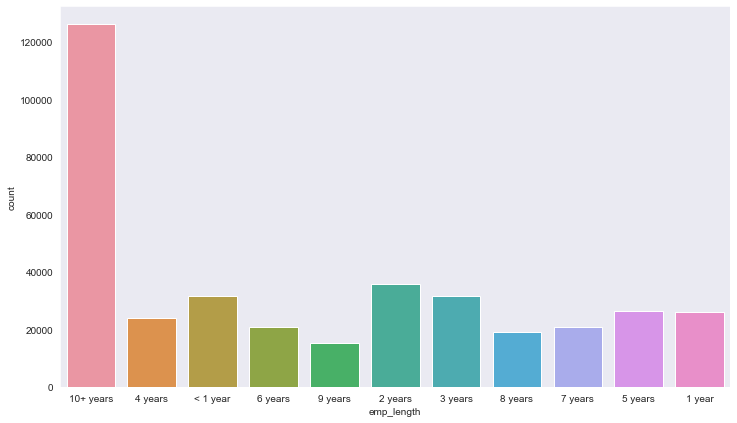

In [500]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,)

In [501]:
# now we sort this emp_length

In [502]:
#df['emp_length'].sort_values().dropna().unique()

sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [503]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
]

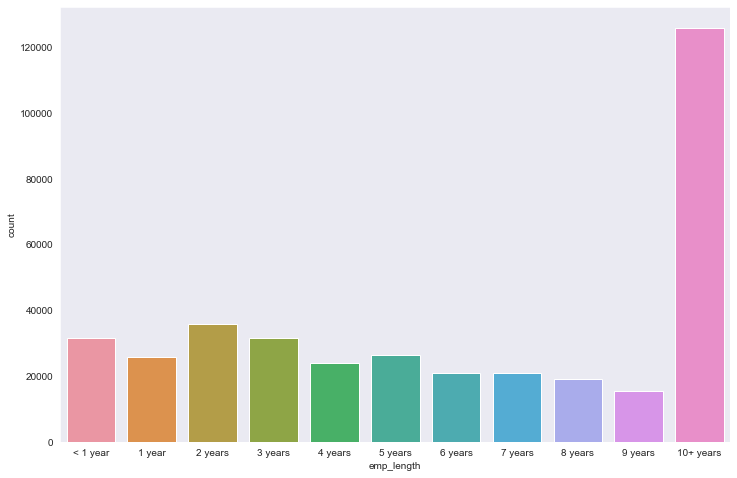

In [504]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

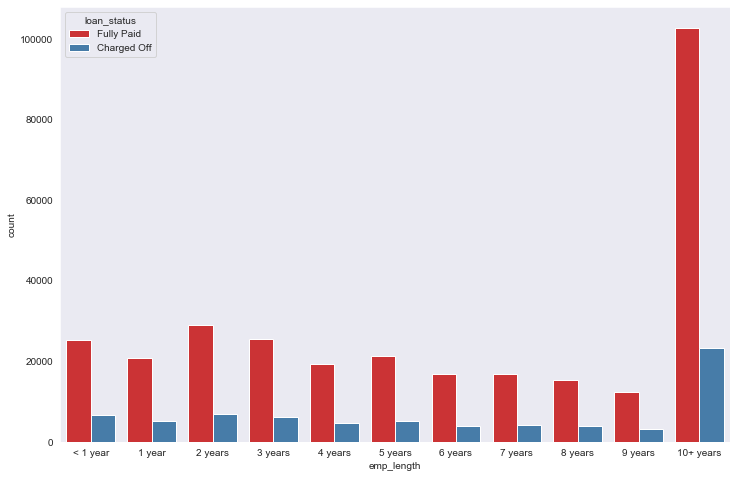

In [505]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',data=df,order=emp_length_order,palette='Set1',hue='loan_status')

In [506]:
# moving deep with relationship of emp_length with charged off relationship

In [507]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [508]:
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [509]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [510]:
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [511]:
emp_length = emp_co/emp_fp

In [512]:
emp_length

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

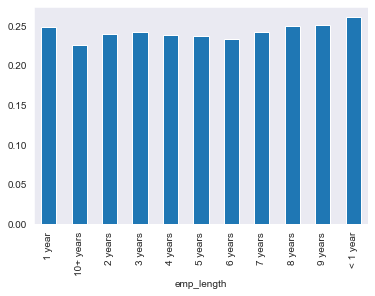

In [513]:
emp_length.plot(kind='bar')

In [514]:
# in a result charge_off rates are almost similiar all across the employment plot
# so now we can drop this emp_length column

In [515]:
df = df.drop('emp_length',axis=1)

In [516]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [517]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [518]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [519]:
len(df['title'])

396030

In [520]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [521]:
len(df['purpose'])

396030

In [522]:
# from the above facts and figures above the title column is same and we can drop it

In [523]:
df = df.drop('title',axis=1)

In [524]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [525]:
feat_info('mort_acc')

Number of mortgage accounts.


In [526]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [527]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [528]:
df.corr()['mort_acc'].sort_values

<bound method Series.sort_values of loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64>

In [529]:
# from the above figures it looks like the highest correlation of mort_acc is total_acc

In [530]:
df.groupby(['total_acc']).mean()['mort_acc']

# we are checking the mean of each entry (total_acc) against mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [531]:
total_acc_avg = df.groupby(['total_acc']).mean()['mort_acc']

In [532]:
total_acc_avg[3]

0.05202312138728324

In [533]:
# we will pass the mort_acc and total_acc row values 
def fill_mort_values(total_acc,mort_acc):
    
    if np.isnan(mort_acc):  # we will check if there is any Nan values in mort_acc column ,
        return total_acc_avg[total_acc] # if it exits then it will pass the value in this total_acc_avg to get the value
    else:
        return mort_acc  # otherwise else return
    

In [534]:
df['mort_acc'] = df.apply(lambda x : fill_mort_values(x['total_acc'],x['mort_acc']) ,axis=1)

In [535]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [536]:
# the correlation % of pub_rec_bankruptcies and revol_bal is less than 0.5% so we can drop these columns

In [537]:
# df = df.drop([' pub_rec_bankruptcies' ,'revol_bal'] ,  axis=1 ) 
# or 
df = df.dropna()

In [538]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [539]:
# now all the missing values have been fixed and dropped out columns also

In [540]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Work with Categorical data and manage these features also

In [541]:
# in this we can split the numeric and non numeric columns
df.select_dtypes(include='object').head(5)

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [542]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [543]:
# now we are going to check each and every categrocial features

In [544]:
# 1. feature term
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [545]:
df['term'] = pd.get_dummies(df['term'],drop_first=True)

In [546]:
df['term'].value_counts()

0    301247
1     93972
Name: term, dtype: int64

In [547]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,0,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,1,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [548]:
# 2. feature drop grade

df = df.drop('grade',axis=1)

In [549]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,0,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,0,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,0,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,0,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,1,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [550]:
# 3. feature sub_grade
# create dummy variables

subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [551]:
# add the new column to the original dataframe

df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [552]:
len(df.columns)

57

In [553]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [554]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [555]:
# 4.feature verification_status, application_type,initial_list_status,purpose 
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [556]:
df.head(5)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,0,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,0,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,0,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,1,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [557]:
# 5.feature home_ownership

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [558]:
# in this we will create dummy variable and replace the NONE and ANY features with OTHER .
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [559]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,1,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [560]:
# 6. feature address

In [561]:
# we can extract the zip code for feature engg
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [562]:
df['zip_code'] = df['address'].apply( lambda address : address[-5:])

In [563]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [564]:
dum = pd.get_dummies(df['zip_code'],drop_first=True)

In [565]:
df = df.drop(['zip_code','address'],axis=1)

In [566]:
df = pd.concat([df,dum],axis=1)

In [567]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,1,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [568]:
# 7. feature issue_d

feat_info('issue_d')

The month which the loan was funded


In [569]:

df = df.drop('issue_d',axis=1)

In [570]:
# 8. feature earliest_cr_line

feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [571]:
df['earliest_cr_line'].head(2)

0    Jun-1990
1    Jul-2004
Name: earliest_cr_line, dtype: object

In [572]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda year: int(year[-4:]))

In [573]:
df['earliest_cr_line'].head(2)

0    1990
1    2004
Name: earliest_cr_line, dtype: int64

In [574]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [575]:
# last feature to drop

df = df.drop('loan_status',axis=1)

# Train Test Split

In [576]:
from sklearn.model_selection import train_test_split

In [577]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalize the data

In [579]:
from sklearn.preprocessing import MinMaxScaler

In [580]:
scaler = MinMaxScaler()

In [581]:
X_train = scaler.fit_transform(X_train)

In [582]:
X_test = scaler.transform(X_test)

# Model Creation

In [583]:
from tensorflow.keras.models import Sequential

In [584]:
from tensorflow.keras.constraints import max_norm

In [585]:
from tensorflow.keras.layers import Dense,Dropout,Activation

In [586]:
from tensorflow.keras.optimizers import Adam

In [587]:
# we have 78 features
X_train.shape

(316175, 78)

In [588]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dense(78,activation='relu'))
model.add(Dense(78,activation='relu'))

model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [589]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,batch_size=256)

Train on 316175 samples, validate on 79044 samples
Epoch 1/600
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2836 - val_loss: 0.2672
Epoch 2/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2619 - val_loss: 0.2632
Epoch 3/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2599 - val_loss: 0.2634
Epoch 4/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2594 - val_loss: 0.2625
Epoch 5/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2585 - val_loss: 0.2618
Epoch 6/600
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2580 - val_loss: 0.2621
Epoch 7/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2576 - val_loss: 0.2621
Epoch 8/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2568 - val_loss: 0.2616
Epoch 9/600
316175/316175 [==============================] - 6s 20us/

316175/316175 [==============================] - 6s 20us/sample - loss: 0.2300 - val_loss: 0.3058
Epoch 75/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2292 - val_loss: 0.3118
Epoch 76/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2294 - val_loss: 0.3101
Epoch 77/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2290 - val_loss: 0.3096
Epoch 78/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2288 - val_loss: 0.3088
Epoch 79/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2284 - val_loss: 0.3130
Epoch 80/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2283 - val_loss: 0.3162
Epoch 81/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2279 - val_loss: 0.3162
Epoch 82/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2275 - val_loss: 0.3185
Epoch 83/600
3

316175/316175 [==============================] - 7s 21us/sample - loss: 0.2150 - val_loss: 0.3788
Epoch 148/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2146 - val_loss: 0.3802
Epoch 149/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2142 - val_loss: 0.3796
Epoch 150/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2145 - val_loss: 0.3852
Epoch 151/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2140 - val_loss: 0.3889
Epoch 152/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2138 - val_loss: 0.3850
Epoch 153/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2141 - val_loss: 0.3844
Epoch 154/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2139 - val_loss: 0.3838
Epoch 155/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2138 - val_loss: 0.3974
Epoch 

316175/316175 [==============================] - 7s 23us/sample - loss: 0.2071 - val_loss: 0.4439
Epoch 221/600
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2064 - val_loss: 0.4396
Epoch 222/600
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2065 - val_loss: 0.4547
Epoch 223/600
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2072 - val_loss: 0.4346
Epoch 224/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2062 - val_loss: 0.4472
Epoch 225/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2059 - val_loss: 0.4447
Epoch 226/600
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2064 - val_loss: 0.4437
Epoch 227/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2061 - val_loss: 0.4372
Epoch 228/600
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2066 - val_loss: 0.4397
Epoch 

316175/316175 [==============================] - 6s 19us/sample - loss: 0.2014 - val_loss: 0.4776
Epoch 294/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2016 - val_loss: 0.4947
Epoch 295/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2016 - val_loss: 0.4878
Epoch 296/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2016 - val_loss: 0.4751
Epoch 297/600
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2018 - val_loss: 0.4847
Epoch 298/600
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2017 - val_loss: 0.4837
Epoch 299/600
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2021 - val_loss: 0.4756
Epoch 300/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2014 - val_loss: 0.4958
Epoch 301/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2013 - val_loss: 0.4881
Epoch 30

Epoch 367/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1997 - val_loss: 0.5217
Epoch 368/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1975 - val_loss: 0.5215
Epoch 369/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1976 - val_loss: 0.5260
Epoch 370/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1981 - val_loss: 0.5137
Epoch 371/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1980 - val_loss: 0.5197
Epoch 372/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1978 - val_loss: 0.5319
Epoch 373/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1978 - val_loss: 0.5150
Epoch 374/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1984 - val_loss: 0.5130
Epoch 375/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1982 - val_loss: 0.5147
E

Epoch 441/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1950 - val_loss: 0.5371
Epoch 442/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1958 - val_loss: 0.5527
Epoch 443/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1949 - val_loss: 0.5554
Epoch 444/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1948 - val_loss: 0.5400
Epoch 445/600
316175/316175 [==============================] - 2s 7us/sample - loss: 0.1952 - val_loss: 0.5633
Epoch 446/600
316175/316175 [==============================] - 2s 7us/sample - loss: 0.1956 - val_loss: 0.5555
Epoch 447/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1951 - val_loss: 0.5521
Epoch 448/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1952 - val_loss: 0.5682
Epoch 449/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1947 - val_loss: 0.5635
E

Epoch 515/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1925 - val_loss: 0.5947
Epoch 516/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1929 - val_loss: 0.5908
Epoch 517/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1929 - val_loss: 0.5977
Epoch 518/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1925 - val_loss: 0.5904
Epoch 519/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1926 - val_loss: 0.5884
Epoch 520/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1931 - val_loss: 0.5901
Epoch 521/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1927 - val_loss: 0.5869
Epoch 522/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1937 - val_loss: 0.5889
Epoch 523/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1921 - val_loss: 0.6023
E

Epoch 589/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1912 - val_loss: 0.6163
Epoch 590/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1908 - val_loss: 0.6151
Epoch 591/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1909 - val_loss: 0.6245
Epoch 592/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1904 - val_loss: 0.6179
Epoch 593/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1919 - val_loss: 0.6146
Epoch 594/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1910 - val_loss: 0.6190
Epoch 595/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1909 - val_loss: 0.6205
Epoch 596/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1903 - val_loss: 0.6063
Epoch 597/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.1913 - val_loss: 0.6146
E

In [590]:
loss_stage_1 = pd.DataFrame(model.history.history)

In [591]:
loss_stage_1

,loss,val_loss
0,0.283583,0.267182
1,0.261905,0.263186
2,0.259890,0.263415
3,0.259369,0.262482
4,0.258525,0.261830
...,...,...
595,0.190255,0.606271
596,0.191258,0.614632
597,0.190911,0.617460
598,0.190663,0.603755


In [592]:
# important stage to check overfitting or underfitting

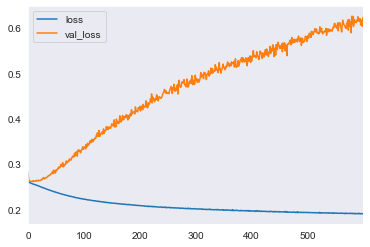

In [593]:
loss_stage_1.plot()
# validation loss is going higher (overfitting case)

In [594]:
# here I work again on the model , to fix the epochs or check with callback function(use Early_Stopping)

In [595]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dense(78,activation='relu'))
model.add(Dense(78,activation='relu'))

model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [596]:
from tensorflow.keras.callbacks import EarlyStopping

In [597]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,mode='min')

In [598]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,batch_size=256,callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/600
316175/316175 [==============================] - 10s 33us/sample - loss: 0.2824 - val_loss: 0.2680
Epoch 2/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2615 - val_loss: 0.2632
Epoch 3/600
316175/316175 [==============================] - 2s 7us/sample - loss: 0.2596 - val_loss: 0.2663
Epoch 4/600
316175/316175 [==============================] - 2s 8us/sample - loss: 0.2588 - val_loss: 0.2638
Epoch 5/600
316175/316175 [==============================] - 2s 7us/sample - loss: 0.2585 - val_loss: 0.2613
Epoch 6/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2578 - val_loss: 0.2611
Epoch 7/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2573 - val_loss: 0.2611
Epoch 8/600
316175/316175 [==============================] - 2s 6us/sample - loss: 0.2569 - val_loss: 0.2612
Epoch 9/600
316175/316175 [==============================] - 2s 6us/sample 

In [599]:
loss_stage_2 = pd.DataFrame(model.history.history)

In [600]:
loss_stage_2

,loss,val_loss
0,0.282351,0.268032
1,0.261512,0.263233
2,0.259628,0.266336
3,0.258806,0.263761
4,0.258490,0.261263
5,0.257785,0.261064
6,0.257333,0.261149
7,0.256860,0.261190
8,0.256154,0.261793
9,0.255824,0.261980


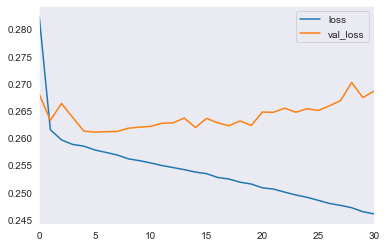

In [601]:
loss_stage_2.plot()

In [602]:
# lets work with dropout layer , still we haven't got proper results

In [614]:
model = Sequential()

# dropout layer 78--->38---->19---->1

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))  #turning off 80% of neurons

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))   #turning off 80% of neurons

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))   #turning off 80% of neurons

model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))


model.compile(optimizer='adam',loss='binary_crossentropy')

In [615]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,batch_size=256,callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/600
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2972 - val_loss: 0.2646
Epoch 2/600
316175/316175 [==============================] - 2s 8us/sample - loss: 0.2650 - val_loss: 0.2635
Epoch 3/600
316175/316175 [==============================] - 3s 8us/sample - loss: 0.2628 - val_loss: 0.2630
Epoch 4/600
316175/316175 [==============================] - 3s 8us/sample - loss: 0.2615 - val_loss: 0.2618
Epoch 5/600
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2606 - val_loss: 0.2618
Epoch 6/600
316175/316175 [==============================] - 2s 7us/sample - loss: 0.2603 - val_loss: 0.2618
Epoch 7/600
316175/316175 [==============================] - 3s 8us/sample - loss: 0.2599 - val_loss: 0.2617
Epoch 8/600
316175/316175 [==============================] - 2s 8us/sample - loss: 0.2596 - val_loss: 0.2618
Epoch 9/600
316175/316175 [==============================] - 3s 8us/sample -

316175/316175 [==============================] - 3s 9us/sample - loss: 0.2521 - val_loss: 0.2614


In [605]:
loss_stage_3 = pd.DataFrame(model.history.history)

In [606]:
loss_stage_3

,loss,val_loss
0,0.300808,0.265861
1,0.265607,0.263502
2,0.262752,0.262625
3,0.261269,0.263338
4,0.260617,0.262016
...,...,...
86,0.251429,0.261516
87,0.251382,0.260960
88,0.251622,0.260952
89,0.251336,0.261489


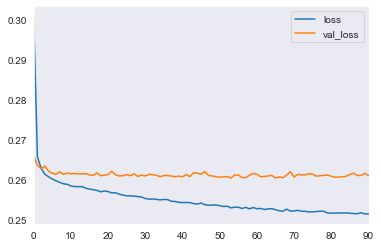

In [607]:
loss_stage_3.plot()

# now with using of droput layer still our graph looks beteer and closer to loss

# Model Evaluation

In [608]:
from sklearn.metrics import classification_report,confusion_matrix

In [609]:
predictions = model.predict_classes(X_test)

In [610]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [611]:
print(confusion_matrix(y_test,predictions))

[[ 6990  8668]
 [  218 63168]]


# Save Our Model

In [616]:
from tensorflow.keras.models import load_model

In [617]:
model.save('out_final_house_prediction_model.h5')

# Now checking our model prediction with random data

In [620]:
# To Generate pseudo-random numbers
import random

In [621]:
# Initialize the random number generator
random.seed(101)

In [622]:
random_int = random.randint(0,len(df))

In [623]:
new_cust = df.drop('loan_repaid',axis=1).iloc[random_int]

In [626]:
new_cust

loan_amnt      25000.00
term               1.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [627]:
model.predict_classes(new_cust.values.reshape(1,78))

array([[1]])

# Check back did your customer paid back the loan or not ?


In [629]:
df.iloc[random_int]['loan_repaid']

1.0